### Conclusion
* YOLO works better when feeding the PIL RGB image into it (which is what we are doing here in the KOA-api all the time!)

In [42]:
from PIL import Image
import io
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [44]:
RGB = Image.open("/Users/guillemcobos/Documents/GitHub/fastapi-yolov8-docker/tests/test_micro_plate_2.jpg").convert("RGB")
# Convert the image to a NumPy array
img_array = np.array(RGB)

# Convert RGB to BGR
bgr_img_array = img_array[:, :, ::-1]

# Convert the NumPy array back to a PIL Image
BGR = Image.fromarray(bgr_img_array)

In [45]:
modelColonies = YOLO("/Users/guillemcobos/Documents/GitHub/fastapi-yolov8-docker/models/micro_colony_counting.pt")


0: 384x640 21 vharveyis, 70.0ms
Speed: 2.3ms preprocess, 70.0ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


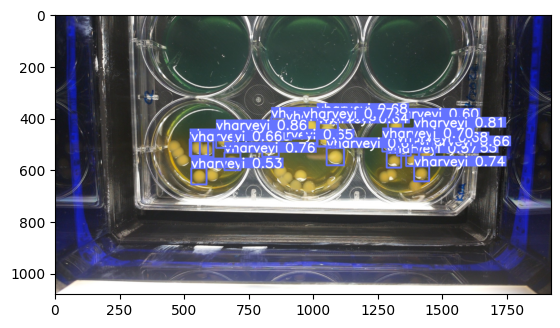

In [49]:
img_pred_on_RGB = Image.fromarray(cv2.cvtColor(modelColonies.predict(RGB, conf = 0.5)[0].plot(), cv2.COLOR_BGR2RGB))
plt.imshow(img_pred_on_RGB)


0: 384x640 14 pddamselaes, 2 vproteolyticuss, 64.2ms
Speed: 2.3ms preprocess, 64.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


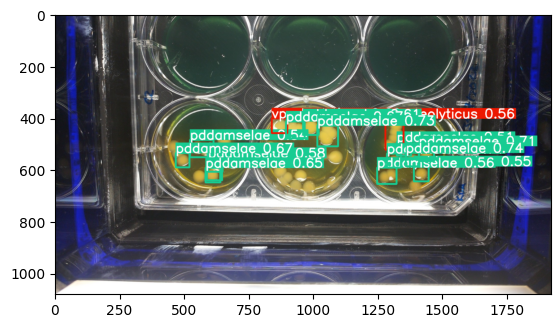

In [50]:
img_pred_on_BGR = Image.fromarray(modelColonies.predict(BGR, conf=0.5)[0].plot())
plt.imshow(img_pred_on_BGR)